# Conexão com postgres e Histórias de Usuários

## Instalando biblioteca de acesso com postgres

!pip install --user psycopg2-binary
!pip install --user seaborn

### Importando biblioteca psycopg2 e Configurando conexão e usando cursosr

In [0]:
import psycopg2
conn = psycopg2.connect(host="baasu.db.elephantsql.com",database="qvhjdrhp", user="qvhjdrhp", password="XaGjXBdpkhAIs-RCib3QHeNpt5FMnU7o")

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Obtendo dados do database com Pandas

!pip install --user pandas

In [0]:
import pandas as pd

# Historia 1

### Objetivo: Obter as culturas que possuem maior necessidade de nutrientes <br>  Peso Planing Poker: 1

Código para obtenção do resultado:

In [0]:
result1 = pd.read_sql_query("""
                            Select cod_plant, nome_cult, quantidade_nutri from cultura
inner join cult_nutri on (cult_nutri.fk_cultura_cod_plant = cultura.cod_plant)
inner join nutrientes on (cult_nutri.fk_nutrientes_cod_nutri = nutrientes.cod_nutri )
order by (quantidade_nutri) desc
limit 10;
;
                            """,conn)
result1

,cod_plant,nome_cult,quantidade_nutri
0,11111,Batata,2
1,22222,Batata doce,2
2,33333,Rabanete,2
3,44444,Beterraba,2
4,55555,Milho,2
5,77777,Soja,2
6,11112,Arroz,2
7,88888,Alface,1
8,66666,Café,1
9,99999,Tomate,1


# História 2

### Objetivo: Obter os tipos de cultura que mais se repetem nas culturas<br>  Peso Planing Poker: 8

codigo para obtenção do resultado:

In [0]:
result2 = pd.read_sql_query("""
                            Select cod_tipo, descr, Count(cod_tipo) as qtd from cultura
inner join tipo_cultura on (cultura.fk_tipo_cultura_cod_tipo = tipo_cultura.cod_tipo)
group by (cod_tipo)
order by (count(cod_plant)) desc
limit 5; 
                            """,conn)
result2

,cod_tipo,descr,qtd
0,3,grão,4
1,1,tuberculo,4
2,2,leguminosa,2


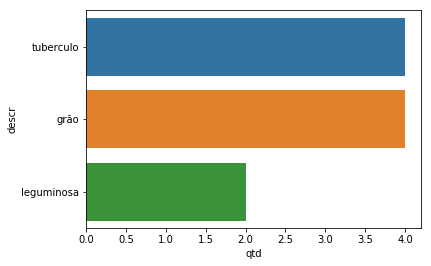

In [0]:
sns.barplot(x=result2.qtd,y=result2.descr)

# Historia 3

### Objetivo: Obter os nutrientes que se repetem mais vezes nas culturas<br>  Peso Planing Poker: 8

In [0]:
result3 = pd.read_sql_query("""
Select cod_nutri, nome_nutri, count(cod_plant) as qtd from cultura
inner join cult_nutri on (cult_nutri.fk_cultura_cod_plant = cultura.cod_plant)
inner join nutrientes on (cult_nutri.fk_nutrientes_cod_nutri = nutrientes.cod_nutri )
group by (cod_nutri)
order by (count(cod_plant)) desc
limit 5;
                            """,conn)
result3

,cod_nutri,nome_nutri,qtd
0,303,Potássio,3
1,606,Nitrogênio,2
2,101,Ferro,2
3,404,Fósforo,1
4,909,Boro,1


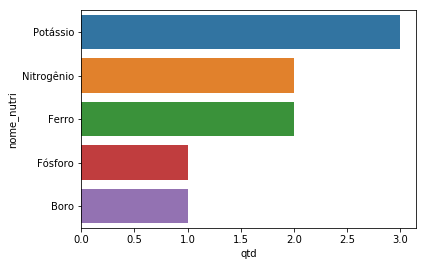

In [0]:
sns.barplot(x=result3.qtd,y=result3.nome_nutri)

# Historia 4

### Objetivo: Obter a quantidade de áreas registradas em cada pais<br>  Peso Planing Poker: 13

In [0]:
result4 = pd.read_sql_query("""
Select pais.cod_pais, pais.descr, count(numero_da_area) as quantidade_de_areas from area
inner join usuario on (area.fk_usuario_cod_usuario = usuario.cod_usuario)
inner join endereco on (usuario.fk_endereco_cod_endereco = endereco.cod_endereco)
inner join bairro on (endereco.fk_bairro_cod_bair = bairro.cod_bair)
inner join municipio on (bairro.fk_municipio_cod_mun = municipio.cod_mun)
inner join estado on (municipio.fk_estado_cod_est = estado.cod_est)
inner join pais on (estado.fk_pais_cod_pais = pais.cod_pais)
group by pais.cod_pais
                            """,conn)
result4

,cod_pais,descr,quantidade_de_areas
0,2,Argentina,3
1,4,Venezuela,2
2,1,Brasil,2
3,3,Chile,3


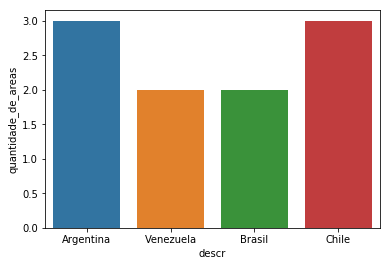

In [0]:
sns.barplot(x=result4.descr,y=result4.quantidade_de_areas)

# Historia 5

### Objetivo: Obter a soma total do tamanho das áreas em cada pais<br>  Peso Planing Poker: 13

In [0]:
result5 = pd.read_sql_query("""
Select pais.cod_pais, pais.descr, sum(tamanho) as tamanho_da_area_em_hec from area
inner join usuario on (area.fk_usuario_cod_usuario = usuario.cod_usuario)
inner join endereco on (usuario.fk_endereco_cod_endereco = endereco.cod_endereco)
inner join bairro on (endereco.fk_bairro_cod_bair = bairro.cod_bair)
inner join municipio on (bairro.fk_municipio_cod_mun = municipio.cod_mun)
inner join estado on (municipio.fk_estado_cod_est = estado.cod_est)
inner join pais on (estado.fk_pais_cod_pais = pais.cod_pais)
group by pais.cod_pais
                            """,conn)
result5

,cod_pais,descr,tamanho_da_area_em_hec
0,2,Argentina,6
1,4,Venezuela,2
2,1,Brasil,3
3,3,Chile,16


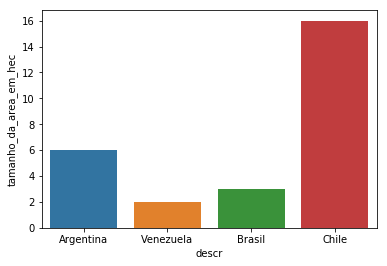

In [0]:
sns.barplot(x=result5.descr,y=result5.tamanho_da_area_em_hec)

# Historia 6

### Objetivo: Obter a quantidade de áreas que existem em cada município<br>  Peso Planing Poker: 13

In [0]:
result6 = pd.read_sql_query("""
Select municipio.cod_mun, municipio.descr, count(numero_da_area) as quantidade_de_areas from area
inner join usuario on (area.fk_usuario_cod_usuario = usuario.cod_usuario)
inner join endereco on (usuario.fk_endereco_cod_endereco = endereco.cod_endereco)
inner join bairro on (endereco.fk_bairro_cod_bair = bairro.cod_bair)
inner join municipio on (bairro.fk_municipio_cod_mun = municipio.cod_mun)
group by municipio.cod_mun
                            """,conn)
result6

,cod_mun,descr,quantidade_de_areas
0,2,São Paulo,3
1,4,Taguatinga,2
2,1,Rio de Janeiro,2
3,3,Vitória,3


# Historia 7

### Objetivo: Obter a quantidade de áreas em que foram plantados cada tipo de cultura em cada municipio <br>  Peso Planing Poker: 20

In [0]:
result7 = pd.read_sql_query("""
Select tipo_cultura.descr as tipo_de_cultura, municipio.descr as municipio, count(numero_da_area) as quantidade_de_areas from area
inner join usuario on (area.fk_usuario_cod_usuario = usuario.cod_usuario)
inner join endereco on (usuario.fk_endereco_cod_endereco = endereco.cod_endereco)
inner join bairro on (endereco.fk_bairro_cod_bair = bairro.cod_bair)
inner join municipio on (bairro.fk_municipio_cod_mun = municipio.cod_mun)
inner join cultura on (area.fk_cultura_cod_plant = cultura.cod_plant)
inner join tipo_cultura on (cultura.fk_tipo_cultura_cod_tipo = tipo_cultura.cod_tipo)
group by tipo_cultura.cod_tipo, municipio.cod_mun
order by tipo_cultura.descr
                            """,conn)
result7

,tipo_de_cultura,municipio,quantidade_de_areas
0,grão,Vitória,1
1,grão,São Paulo,2
2,grão,Rio de Janeiro,1
3,leguminosa,Vitória,2
4,tuberculo,Rio de Janeiro,1
5,tuberculo,Taguatinga,2
6,tuberculo,São Paulo,1


References

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/